In [12]:
import os
import pandas as pd

# Directory path containing the CSV files
directory_path = '/home/ldy/Workspace/BrainAligning_retrieval/Outputs/EEG_radar_graph1/Classification/insubject'

# Function to calculate the maximums of the metrics
def calculate_maximums(file_path):
    df = pd.read_csv(file_path)
    maximums = {
        'v2_acc': df['v2_acc'].max(),
        'v4_acc': df['v4_acc'].max(),
        'v10_acc': df['v10_acc'].max(),
        'test_accuracy': df['test_accuracy'].max(),  # TOP1 accuracy
        'top5_acc': df['top5_acc'].max()  # TOP5 accuracy
    }
    return maximums

# Dictionary to store the results
results = {}

# Define the output file name
output_file_name = 'subject_averages.csv'

# Check if the output file already exists and skip it
output_file_path = os.path.join(directory_path, output_file_name)
if os.path.exists(output_file_path):
    os.remove(output_file_path)

# Iterate over each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.csv') and filename != output_file_name:
        # Extract the method name from the filename
        method_name = filename.split('_')[0]
        file_path = os.path.join(directory_path, filename)
        maximums = calculate_maximums(file_path)
        
        # Aggregate the results by method name
        if method_name not in results:
            results[method_name] = {metric: [] for metric in maximums}
        for metric in maximums:
            results[method_name][metric].append(maximums[metric])

# Calculate the average for each method and metric
averages = {method: {metric: sum(values) / len(values) for metric, values in metrics.items()}
            for method, metrics in results.items()}

# Sort the results by method name
sorted_averages = dict(sorted(averages.items()))

# Convert the sorted averages dictionary to a pandas DataFrame for easier CSV output
averages_df = pd.DataFrame.from_dict(sorted_averages, orient='index')

# You may want to include more descriptive column names here
averages_df.columns = ['V2 Accuracy', 'V4 Accuracy', 'V10 Accuracy', 'Test Accuracy', 'Top5 Accuracy']

# Save the DataFrame to a CSV file
averages_df.to_csv(output_file_path, index_label='Method')

print(f"Averages saved to {output_file_path}")

Averages saved to /home/ldy/Workspace/BrainAligning_retrieval/Outputs/EEG_radar_graph1/Classification/insubject/subject_averages.csv


index [0.  0.7 1.4 2.1 2.8]
bar_positions 0.0
group_start 0.02
group_end 0.6400000000000001
xmin 0.005714285714285713
xmax 0.18285714285714286
chance_levels[condition_index] 0.5
bar_positions 0.7
group_start 0.7200000000000001
group_end 1.3400000000000003
xmin 0.2057142857142857
xmax 0.3828571428571429
chance_levels[condition_index] 0.25
bar_positions 1.4
group_start 1.4200000000000002
group_end 2.0400000000000005
xmin 0.4057142857142857
xmax 0.582857142857143
chance_levels[condition_index] 0.1
bar_positions 2.1
group_start 2.12
group_end 2.74
xmin 0.6057142857142856
xmax 0.7828571428571428
chance_levels[condition_index] 0.025
bar_positions 2.8
group_start 2.8200000000000003
group_end 3.4400000000000004
xmin 0.8057142857142857
xmax 0.9828571428571429
chance_levels[condition_index] 0.005


/tmp/ipykernel_267356/2209395086.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(methods))


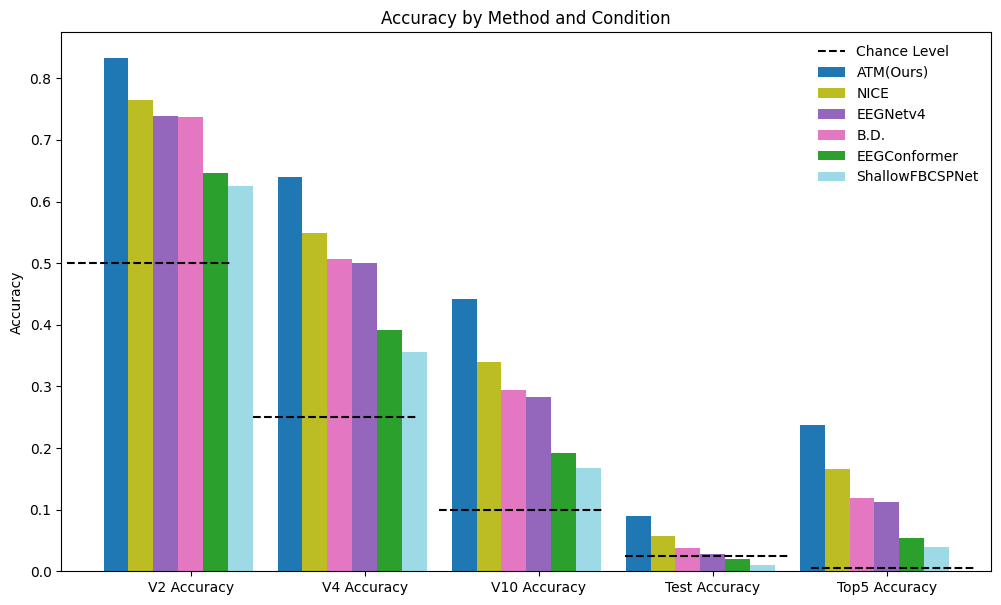

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

output_file_path = "/home/ldy/Workspace/BrainAligning_retrieval/Outputs/EEG_radar_graph1/Classification/insubject/subject_averages.csv"

df = pd.read_csv(output_file_path)

# Define the figure and axis
fig, ax = plt.subplots(figsize=(12, 7))

# Extract methods and conditions from the DataFrame
methods = df['Method'].unique()  # Ensure methods are unique for consistent coloring
conditions = df.columns[1:]  # Assuming the first column is 'Method'

# Convert conditions to list for indexing
conditions_list = conditions.tolist()

# Width of the bars
bar_width = 0.1

# Calculate the number of groups and the total width for each group including the gap
num_conditions = len(conditions)
group_width = (bar_width * (len(methods)+1))  # Total width of a group including the gap

# Adjust the starting index to reduce the gap between the y-axis and the first bar
index = np.arange(0, group_width * num_conditions, group_width)
print("index", index)
# Initialize a color map for methods
colors = plt.cm.get_cmap('tab20', len(methods))
method_colors = {method: colors(i) for i, method in enumerate(methods)}

# Define chance levels for each condition
chance_levels = [0.5, 0.25, 0.1, 0.025, 0.005]

# Loop to plot the bars for each method and draw chance level lines
for condition_index, condition in enumerate(conditions_list):
    # Create a temporary DataFrame to sort both values and methods together
    temp_df = df[['Method', condition]].copy()
    temp_df.sort_values(by=condition, ascending=False, inplace=True)
    
    sorted_values = temp_df[condition].values
    sorted_methods = temp_df['Method'].values
    
    # Position of each bar is adjusted by the bar_width
    for i, method in enumerate(sorted_methods):
        bar_positions = index[condition_index] + (i * bar_width)
        bar_positions = round(index[condition_index] + (i * bar_width), 2)
        if i==0:
            print("bar_positions", bar_positions)
        # Use the method's color from the dictionary
        ax.bar(bar_positions, sorted_values[i], bar_width, color=method_colors[method], label=method if condition_index == 0 else "")
    
    # print("xmin", group_start / (index[-1] + group_width))
    offset = 0.02
    group_start = index[condition_index]+offset
    group_end = group_start + (len(methods) * bar_width)+offset

    xmin = group_start / (index[-1] + group_width)
    xmax = group_end / (index[-1] + group_width)
    print("group_start", group_start)
    print("group_end", group_end)
    print("xmin", xmin)
    print("xmax", xmax)
    print("chance_levels[condition_index]", chance_levels[condition_index])
    ax.axhline(y=chance_levels[condition_index], color='black', linestyle='--', 
               label='Chance Level' if condition_index == 0 else "", 
               xmin=xmin, 
               xmax=xmax)



# Add a legend for the first occurrence of each method
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right', frameon=False)

# Set x-axis labels and ticks to reflect the updated conditions
ax.set_xticks(index + (group_width / 2) - (bar_width / 2))

ax.set_xticklabels(conditions)

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Method and Condition')

# Show the plot
# plt.tight_layout()
plt.show()

/tmp/ipykernel_267356/2353457307.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(methods))


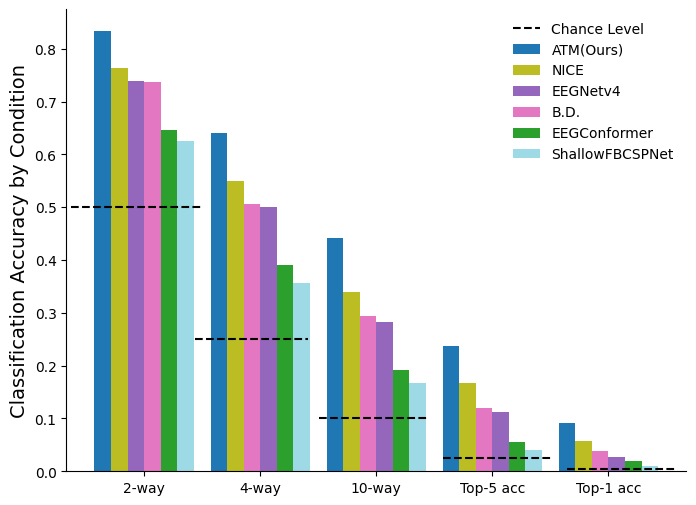

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

output_file_path = "/home/ldy/Workspace/BrainAligning_retrieval/Outputs/EEG_radar_graph1/Classification/insubject/subject_averages.csv"

df = pd.read_csv(output_file_path)



new_order = ['Method'] + conditions
df = df[new_order]

# Define the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Extract methods from the DataFrame

# Width of the bars
bar_width = 0.1

# Calculate the number of groups and the total width for each group including the gap
num_conditions = len(conditions)
group_width = (bar_width * (len(methods)+1))  # Total width of a group including the gap

# Adjust the starting index
index = np.arange(num_conditions) * group_width 

# Initialize a color map for methods
colors = plt.cm.get_cmap('tab20', len(methods))
method_colors = {method: colors(i) for i, method in enumerate(methods)}

# Define chance levels for each condition
chance_levels = [0.5, 0.25, 0.1, 0.025, 0.005]

# Loop to plot the bars for each method and draw chance level lines
for condition_index, condition in enumerate(conditions):
    temp_df = df[['Method', condition]].copy()
    temp_df.sort_values(by=condition, ascending=False, inplace=True)
    
    sorted_values = temp_df[condition].values
    sorted_methods = temp_df['Method'].values
    
    for i, method in enumerate(sorted_methods):
        bar_positions = index[condition_index] + (i * bar_width)
        ax.bar(bar_positions, sorted_values[i], bar_width, color=method_colors[method], label=method if condition_index == 0 else "")
    
    # Draw chance level lines
    offset = 0.02
    group_start = index[condition_index]+offset
    group_end = group_start + (len(methods) * bar_width)

    xmin = group_start / (index[-1] + group_width) +offset*1/(condition_index+10)
    xmax = group_end / (index[-1] + group_width) +offset*1/(condition_index+0.5)

    ax.axhline(y=chance_levels[condition_index], color='black', linestyle='--', 
               label='Chance Level' if condition_index == 0 else "", 
               xmin=xmin, 
               xmax=xmax)

# Hide the top and right border of the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add a legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right', frameon=False)

# Set x-axis labels and ticks
ax.set_xticks(index + (group_width / 2) - (bar_width))
ax.set_xticklabels(conditions, fontsize=10)

ax.set_ylabel('Classification Accuracy by Condition', fontsize=14)

# Save and show the plot
fig.savefig("../plots/cls_acc_method_Condition.png", dpi=300)
plt.show()

index [0. 1. 2. 3. 4.]
bar_positions 0.0
bar_positions 1.0
bar_positions 2.0
bar_positions 3.0
bar_positions 4.0


/tmp/ipykernel_94804/689112197.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(methods))


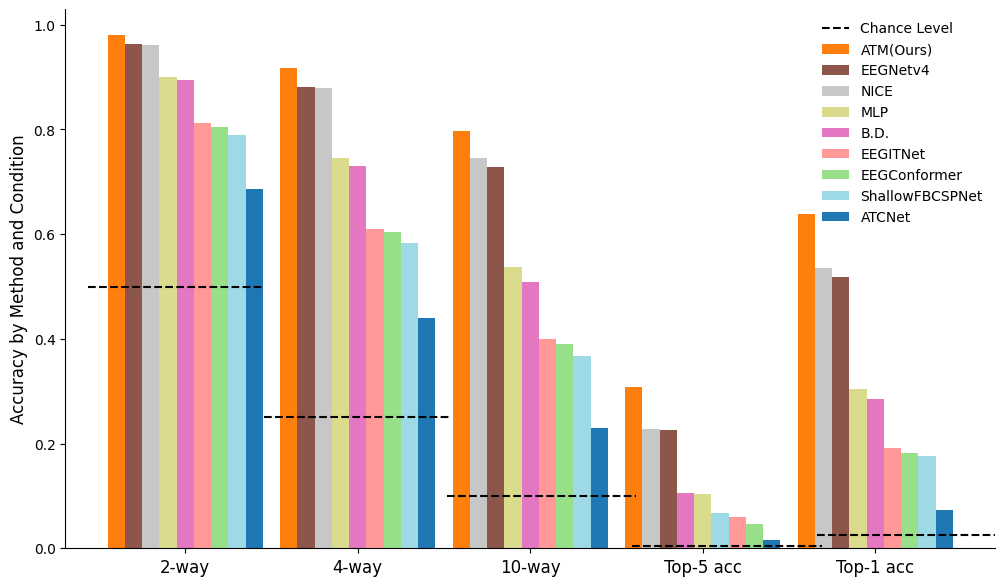

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

output_file_path = "/home/ldy/Workspace/BrainAligning_retrieval/Outputs/EEG_radar_graph1/Retrieval/insubject/batchsize=1024/subject_averages_bar.csv"

df = pd.read_csv(output_file_path)

# Define the figure and axis
fig, ax = plt.subplots(figsize=(12, 7))

# Extract methods and conditions from the DataFrame


# Convert conditions to list for indexing
# conditions_list = conditions.tolist()

# Width of the bars
bar_width = 0.1

# Calculate the number of groups and the total width for each group including the gap
num_conditions = len(conditions)
group_width = (bar_width * (len(methods)+1))  # Total width of a group including the gap

# Adjust the starting index to reduce the gap between the y-axis and the first bar
# index = np.arange(num_conditions) * group_width + offset*2.5
index = np.arange(num_conditions) * group_width 
print("index", index)
# Initialize a color map for methods
colors = plt.cm.get_cmap('tab20', len(methods))
method_colors = {method: colors(i) for i, method in enumerate(methods)}

# Define chance levels for each condition
chance_levels = [0.5, 0.25, 0.1, 0.005, 0.025]

# Loop to plot the bars for each method and draw chance level lines
for condition_index, condition in enumerate(conditions_list):
    # Create a temporary DataFrame to sort both values and methods together
    temp_df = df[['Method', condition]].copy()
    temp_df.sort_values(by=condition, ascending=False, inplace=True)
    
    sorted_values = temp_df[condition].values
    sorted_methods = temp_df['Method'].values
    
    # Position of each bar is adjusted by the bar_width
    for i, method in enumerate(sorted_methods):
        bar_positions = index[condition_index] + (i * bar_width)
        bar_positions = round(index[condition_index] + (i * bar_width), 2)
        if i==0:
            print("bar_positions", bar_positions)
        # Use the method's color from the dictionary
        ax.bar(bar_positions, sorted_values[i], bar_width, color=method_colors[method], label=method if condition_index == 0 else "")
    
    # print("xmin", group_start / (index[-1] + group_width))
    # if condition_index==0:
    #     group_start = index[condition_index] + offset*2.4
    #     group_end = group_start + (len(methods) * bar_width)
    #     xmin = group_start / (index[-1] + group_width +offset*3)
    #     xmax = group_end / (index[-1] + group_width +offset*3)
    # else:
    offset = 0.02
    group_start = index[condition_index]+offset
    group_end = group_start + (len(methods) * bar_width)

    xmin = group_start / (index[-1] + group_width) +offset*1/(condition_index+1)
    xmax = group_end / (index[-1] + group_width) +offset*1.5

    # print("xmax - xmin", xmax  - xmin)
    # print("group_start", group_start)
    # print("group_end", group_end)
    # print("xmin", xmin)
    # print("xmax", xmax)
    ax.axhline(y=chance_levels[condition_index], color='black', linestyle='--', 
               label='Chance Level' if condition_index == 0 else "", 
               xmin=xmin, 
               xmax=xmax)



# Hide the top and right border of the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add a legend for the first occurrence of each method
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right', frameon=False)

# Set x-axis labels and ticks to reflect the updated conditions
ax.set_xticks(index + (group_width / 2) - (bar_width))
ax.set_xticklabels(conditions, fontsize=12)

ax.set_ylabel('Accuracy by Method and Condition', fontsize=12)

fig.savefig("../plots/acc_method_Condition.png", dpi=300)

# Show the plot
plt.show()

/tmp/ipykernel_94804/3207065716.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(methods))


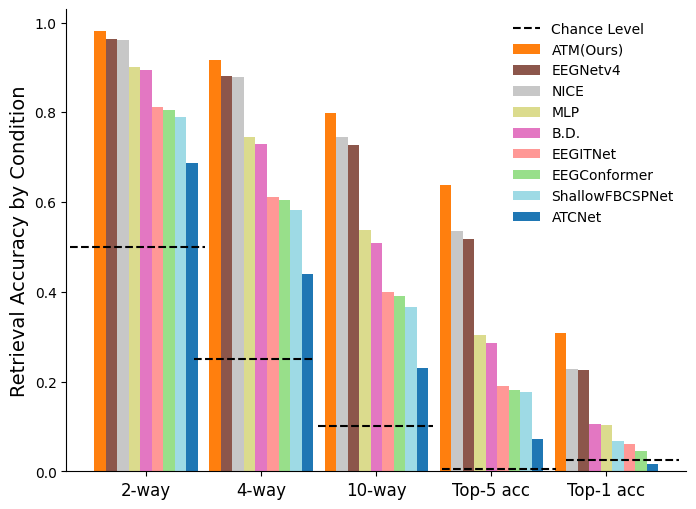

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

output_file_path = "/home/ldy/Workspace/BrainAligning_retrieval/Outputs/EEG_radar_graph1/Retrieval/insubject/batchsize=1024/subject_averages_bar.csv"

df = pd.read_csv(output_file_path)



new_order = ['Method'] + conditions
df = df[new_order]

# Define the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Extract methods from the DataFrame

# Width of the bars
bar_width = 0.1

# Calculate the number of groups and the total width for each group including the gap
num_conditions = len(conditions)
group_width = (bar_width * (len(methods)+1))  # Total width of a group including the gap

# Adjust the starting index
index = np.arange(num_conditions) * group_width 

# Initialize a color map for methods
colors = plt.cm.get_cmap('tab20', len(methods))
method_colors = {method: colors(i) for i, method in enumerate(methods)}

# Define chance levels for each condition
chance_levels = [0.5, 0.25, 0.1, 0.005, 0.025]  # Adjust according to the new order of conditions if necessary

# Loop to plot the bars for each method and draw chance level lines
for condition_index, condition in enumerate(conditions):
    temp_df = df[['Method', condition]].copy()
    temp_df.sort_values(by=condition, ascending=False, inplace=True)
    
    sorted_values = temp_df[condition].values
    sorted_methods = temp_df['Method'].values
    
    for i, method in enumerate(sorted_methods):
        bar_positions = index[condition_index] + (i * bar_width)
        ax.bar(bar_positions, sorted_values[i], bar_width, color=method_colors[method], label=method if condition_index == 0 else "")
    
    # Draw chance level lines
    offset = 0.02
    group_start = index[condition_index]+offset
    group_end = group_start + (len(methods) * bar_width)

    xmin = group_start / (index[-1] + group_width) +offset*1/(condition_index+10)
    xmax = group_end / (index[-1] + group_width) +offset*1/(condition_index+0.5)

    ax.axhline(y=chance_levels[condition_index], color='black', linestyle='--', 
               label='Chance Level' if condition_index == 0 else "", 
               xmin=xmin, 
               xmax=xmax)

# Hide the top and right border of the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add a legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right', frameon=False)

# Set x-axis labels and ticks
ax.set_xticks(index + (group_width / 2) - (bar_width))
ax.set_xticklabels(conditions, fontsize=12)

ax.set_ylabel('Retrieval Accuracy by Condition', fontsize=14)

# Save and show the plot
fig.savefig("../plots/acc_method_Condition.png", dpi=300)
plt.show()

12.0